___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [6]:
try:
    import jupyter_black
    jupyter_black.load()  # Auto-Formatting to Improve Code Readability
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [7]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"   # WARNING and ERROR are open

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import SVG

import numpy as np
import pandas as pd

import seaborn as sns


# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets, layers, models

In [29]:
!pip show tensorflow


Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\damlaharmankaya\anaconda3\envs\tensorflow\lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [30]:
import sys
print(sys.executable)

C:\Users\DamlaHarmankaya\anaconda3\envs\tf_env\python.exe


In [31]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [32]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

In [33]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [35]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
tf.keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [36]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [37]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [38]:
# Checking the shape of one image
x_train[5].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [39]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

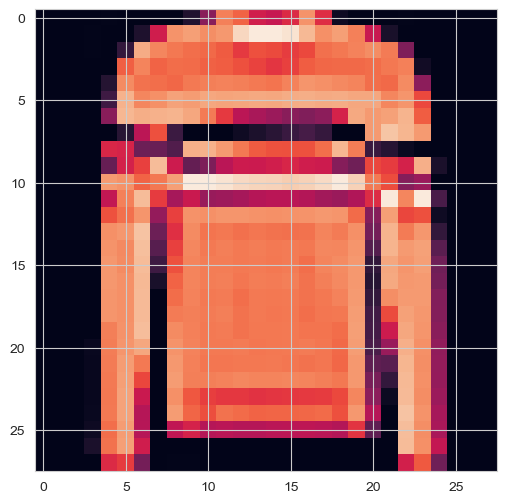

In [40]:
plt.imshow(x_train[5])
plt.show()

In [41]:
y_train[5]

2

In [42]:
y_train.shape

(60000,)

In [43]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [44]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [45]:
x_train.shape

(54000, 28, 28)

In [46]:
x_val.shape

(6000, 28, 28)

In [47]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5403, 5392, 5389, 5413, 5373, 5379, 5381, 5450, 5410, 5410],
       dtype=int64))

In [48]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [49]:
y_train[0]

5

In [50]:
classes[int(y_train[0])]

'Sandal'

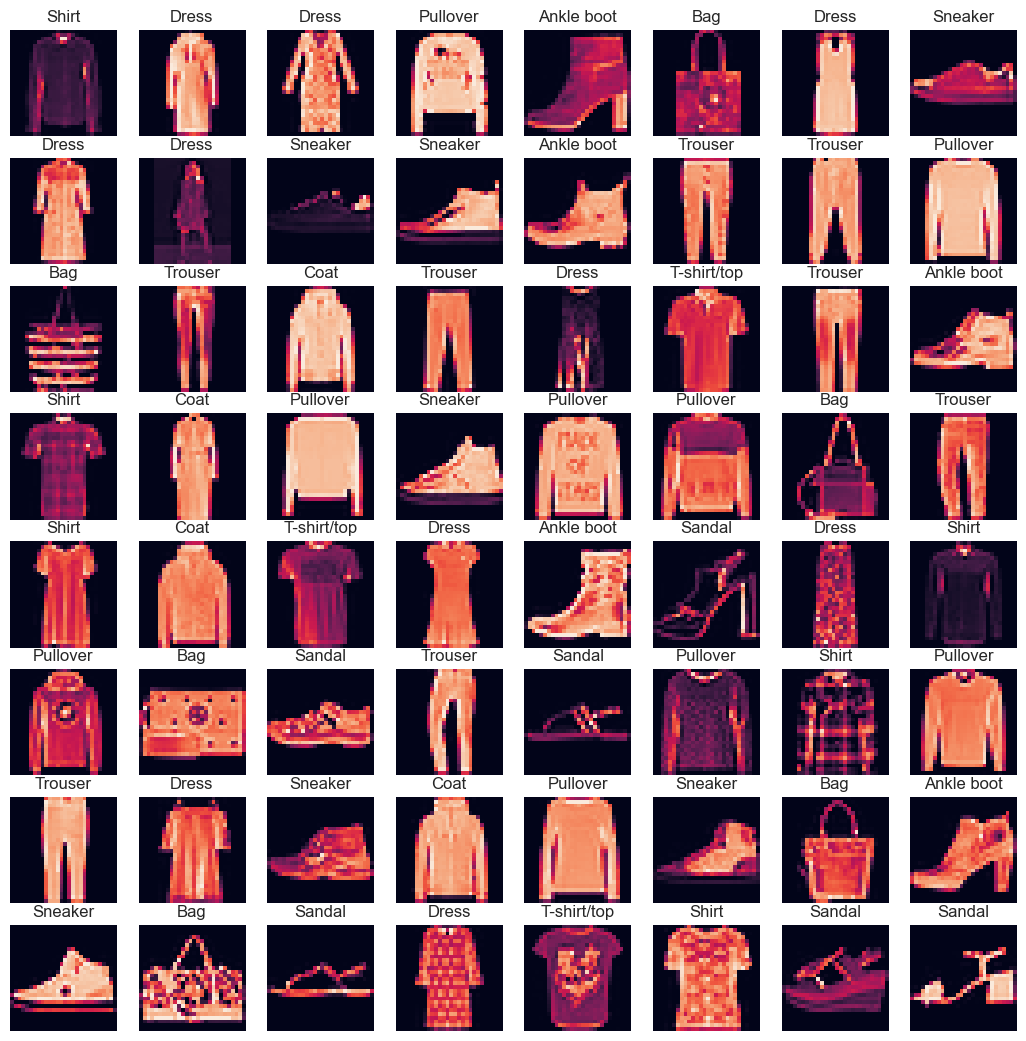

In [52]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [53]:
x_train[5].min()

0

In [54]:
x_train[5].max()

255

In [55]:
# Normalize image pixels
x_train = x_train.astype("float32")
x_val = x_val.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_val /= 255
x_test /= 255

In [56]:
x_train[5].min()

0.0

In [57]:
x_train[5].max()

1.0

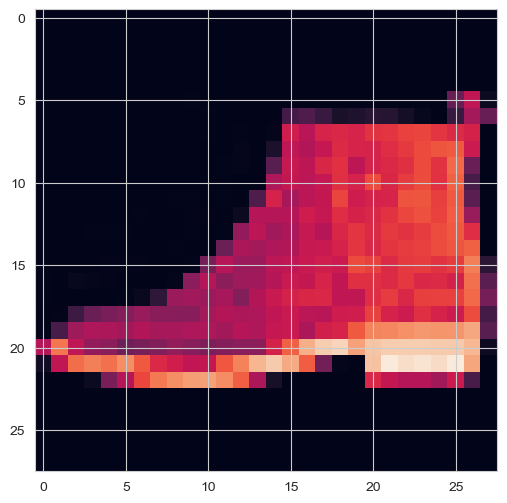

In [59]:
plt.imshow(x_train[5])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [60]:
x_train.shape, x_test.shape

((54000, 28, 28), (10000, 28, 28))

In [61]:
y_train

array([5, 2, 9, ..., 6, 6, 1], dtype=uint8)

In [62]:
np.expand_dims(x_train, 3).shape

(54000, 28, 28, 1)

In [63]:
X_train = np.expand_dims(x_train, 3)
X_val =  np.expand_dims(x_val, 3)
X_test = np.expand_dims(x_test, 3)

In [64]:
X_train.shape, X_val.shape, X_test.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [65]:
from tensorflow.keras.utils import to_categorical

In [66]:
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(54000, 10)

In [67]:
y_train[0]

5

In [68]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [97]:
model = Sequential()

model.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="same",
    )
)
model.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))

model.add(Conv2D(filters=48, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 48)        12144     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8112)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True
)

In [101]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, Y_val),
    callbacks=[early_stop],
)

Epoch 1/50
1688/1688 [==============================] - 41s 23ms/step - loss: 0.8226 - accuracy: 0.6888 - val_loss: 0.5866 - val_accuracy: 0.7632
Epoch 2/50
1688/1688 [==============================] - 45s 26ms/step - loss: 0.5185 - accuracy: 0.8079 - val_loss: 0.5779 - val_accuracy: 0.7852
Epoch 3/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.4516 - accuracy: 0.8331 - val_loss: 0.4881 - val_accuracy: 0.8188
Epoch 4/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.4087 - accuracy: 0.8500 - val_loss: 0.4434 - val_accuracy: 0.8335
Epoch 5/50
1688/1688 [==============================] - 49s 29ms/step - loss: 0.3749 - accuracy: 0.8621 - val_loss: 0.3809 - val_accuracy: 0.8562
Epoch 6/50
1688/1688 [==============================] - 55s 33ms/step - loss: 0.3455 - accuracy: 0.8721 - val_loss: 0.3650 - val_accuracy: 0.8630
Epoch 7/50
1688/1688 [==============================] - 51s 30ms/step - loss: 0.3251 - accuracy: 0.8811 - val_loss: 0.3511 -

In [102]:
model.metrics_names

['loss', 'accuracy']

In [103]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.823,0.689,0.587,0.763
1,0.519,0.808,0.578,0.785
2,0.452,0.833,0.488,0.819
3,0.409,0.850,0.443,0.834
4,0.375,0.862,0.381,0.856
5,0.346,0.872,0.365,0.863
6,0.325,0.881,0.351,0.873


**TASK 7: Plot values of metrics you used in your model.**

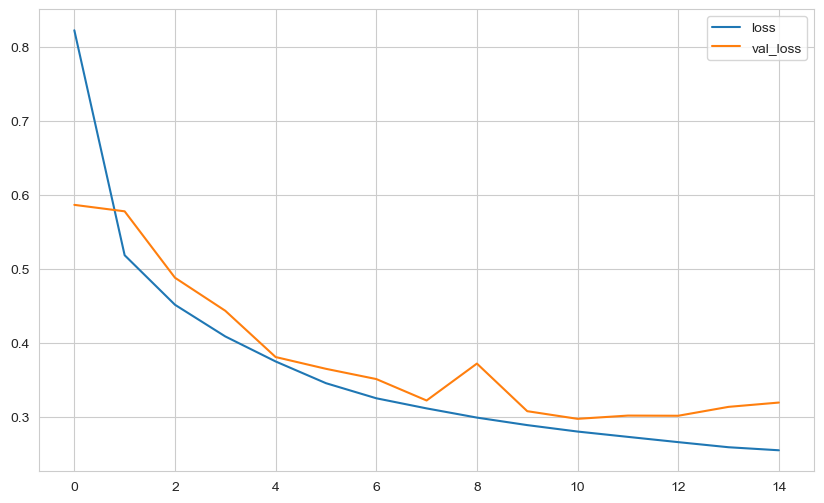

In [104]:
summary[["loss", "val_loss"]].plot()
plt.show()

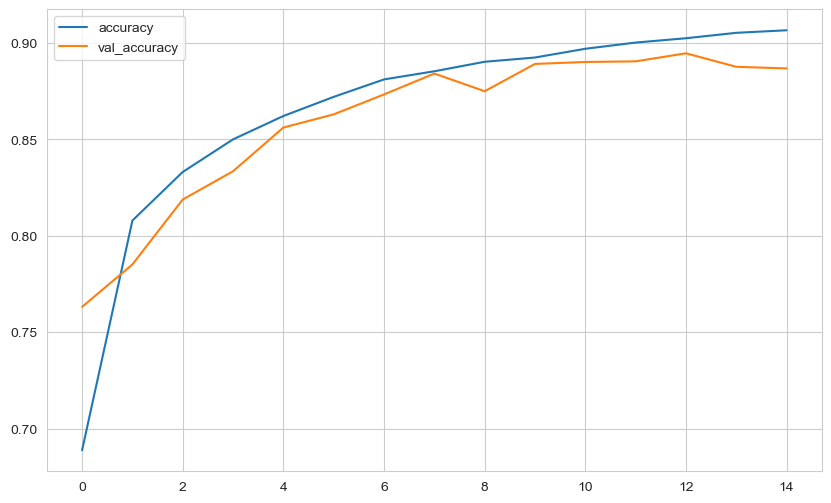

In [105]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [106]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [107]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3161 - accuracy: 0.8880


[0.3161458373069763, 0.8880000114440918]

In [108]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3161458373069763
Test accuracy: 0.8880000114440918


In [109]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 3s 8ms/step


array([[6.8412041e-06, 8.0854761e-08, 1.2554306e-06, ..., 9.3699889e-03,
        7.9161357e-05, 9.8671925e-01],
       [3.7427185e-06, 3.8410209e-11, 9.9901497e-01, ..., 8.9578069e-17,
        3.3133706e-08, 1.8781975e-15],
       [2.8591974e-06, 9.9999636e-01, 7.1700618e-10, ..., 5.8843045e-13,
        1.2103987e-09, 2.9059125e-12],
       ...,
       [1.6373032e-04, 1.0531269e-09, 1.2735058e-04, ..., 4.4577300e-07,
        9.9939084e-01, 1.1661150e-08],
       [5.5408775e-05, 9.9943471e-01, 8.1121436e-07, ..., 2.2533731e-08,
        8.5109659e-06, 6.4008268e-06],
       [9.5754809e-04, 1.7341197e-05, 2.5095672e-03, ..., 1.4618979e-02,
        8.0159921e-03, 1.4389347e-03]], dtype=float32)

In [110]:
pred_prob.shape

(10000, 10)

In [111]:
pred_prob[0]

array([6.8412041e-06, 8.0854761e-08, 1.2554306e-06, 1.3613815e-06,
       2.7783171e-08, 3.8073007e-03, 1.4680489e-05, 9.3699889e-03,
       7.9161357e-05, 9.8671925e-01], dtype=float32)

In [112]:
np.argmax(pred_prob[0])

9

In [113]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [114]:
y_pred.shape

(10000,)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.77      0.84      0.81      1000
           3       0.93      0.86      0.89      1000
           4       0.83      0.77      0.80      1000
           5       0.98      0.97      0.97      1000
           6       0.70      0.70      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [116]:
print(confusion_matrix(y_test, y_pred))

[[863   0  19   9   3   1  98   0   7   0]
 [  3 979   0  10   2   0   4   0   2   0]
 [ 17   1 841   7  61   0  70   0   3   0]
 [ 37   9  18 860  48   0  24   0   4   0]
 [  0   1 116  22 767   0  94   0   0   0]
 [  0   0   0   1   0 971   0  19   0   9]
 [141   1  85  17  45   0 699   0  12   0]
 [  0   0   0   0   0  12   0 961   1  26]
 [  1   1   7   2   3   1   2   5 978   0]
 [  0   0   0   0   0   9   2  28   0 961]]


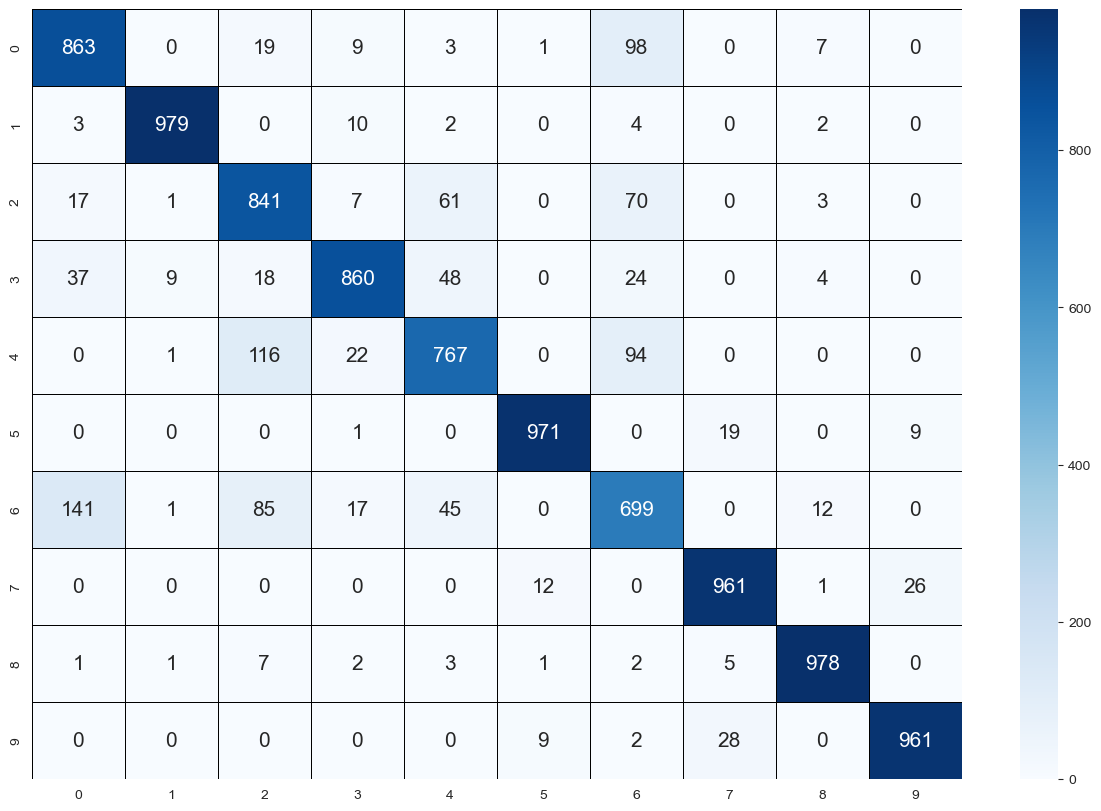

In [117]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [118]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [119]:
np.not_equal(y_test, y_pred).sum()

1120

In [120]:
np.equal(y_test, y_pred).sum()

8880

# Modeling-2

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [193]:
model = Sequential()

model.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(28, 28, 1),
        padding="same",
    )
)
model.add(Conv2D(filters=56, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=112, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [194]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 28)        280       
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 56)        14168     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 56)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 14, 14, 56)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 112)       56560     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 112)        0         
 g2D)                                                

In [195]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True
)

In [196]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
1688/1688 [==============================] - 54s 31ms/step - loss: 1.0483 - accuracy: 0.5978 - val_loss: 0.6477 - val_accuracy: 0.7585
Epoch 2/50
1688/1688 [==============================] - 52s 31ms/step - loss: 0.5677 - accuracy: 0.7855 - val_loss: 0.6335 - val_accuracy: 0.7821
Epoch 3/50
1688/1688 [==============================] - 53s 31ms/step - loss: 0.4904 - accuracy: 0.8168 - val_loss: 0.4716 - val_accuracy: 0.8337
Epoch 4/50
1688/1688 [==============================] - 59s 35ms/step - loss: 0.4436 - accuracy: 0.8343 - val_loss: 0.5052 - val_accuracy: 0.8477
Epoch 5/50
1688/1688 [==============================] - 62s 37ms/step - loss: 0.4135 - accuracy: 0.8465 - val_loss: 0.4028 - val_accuracy: 0.8613
Epoch 6/50
1688/1688 [==============================] - 51s 30ms/step - loss: 0.3934 - accuracy: 0.8548 - val_loss: 0.4624 - val_accuracy: 0.8413
Epoch 7/50
1688/1688 [==============================] - 55s 33ms/step - loss: 0.3798 - accuracy: 0.8592 - val_loss: 0.4019 -

In [197]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.048,0.598,0.648,0.758
1,0.568,0.786,0.634,0.782
2,0.490,0.817,0.472,0.834
3,0.444,0.834,0.505,0.848
4,0.414,0.846,0.403,0.861
5,0.393,0.855,0.462,0.841
6,0.380,0.859,0.402,0.855
7,0.369,0.863,0.365,0.867
8,0.359,0.868,0.362,0.869
9,0.357,0.869,0.559,0.842


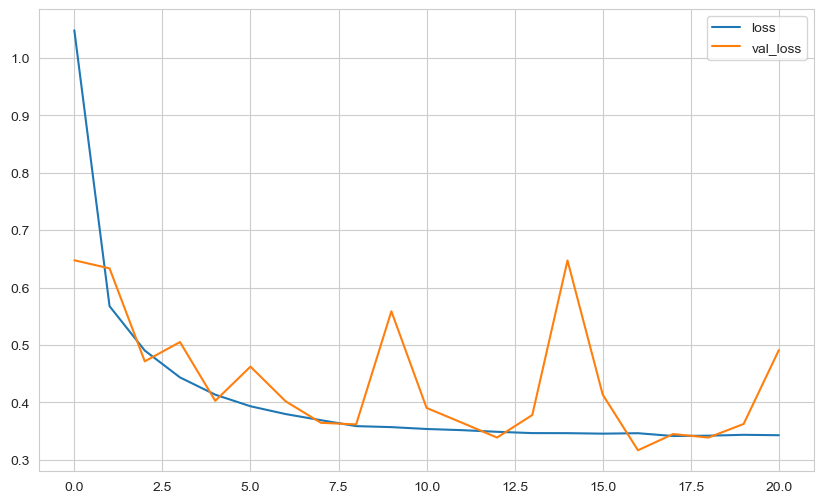

In [198]:
summary[["loss", "val_loss"]].plot()
plt.show()

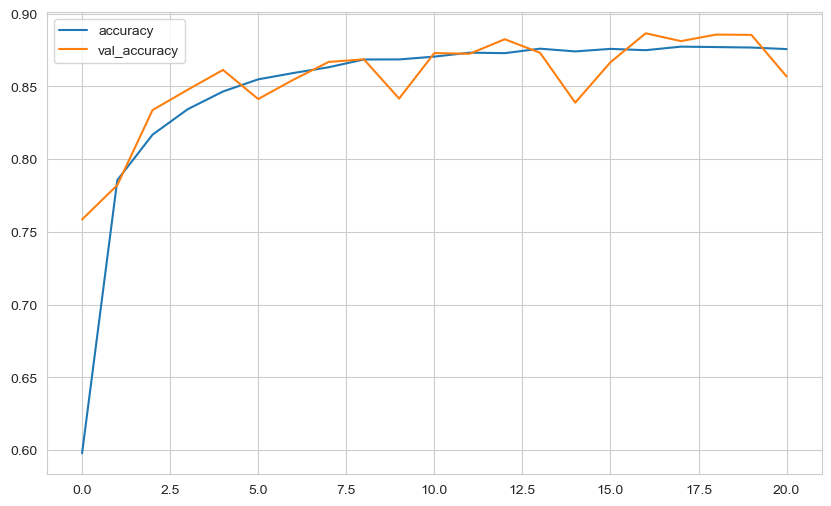

In [199]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [200]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3167 - accuracy: 0.8865


[0.3166969120502472, 0.8865000009536743]

In [201]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3166969120502472
Test accuracy: 0.8865000009536743


In [202]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [203]:
y_pred = np.argmax(pred_prob, axis=1)

In [204]:
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.92      0.88      0.90      1000
           4       0.74      0.89      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.61      0.67      1000
           7       0.93      0.95      0.94      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



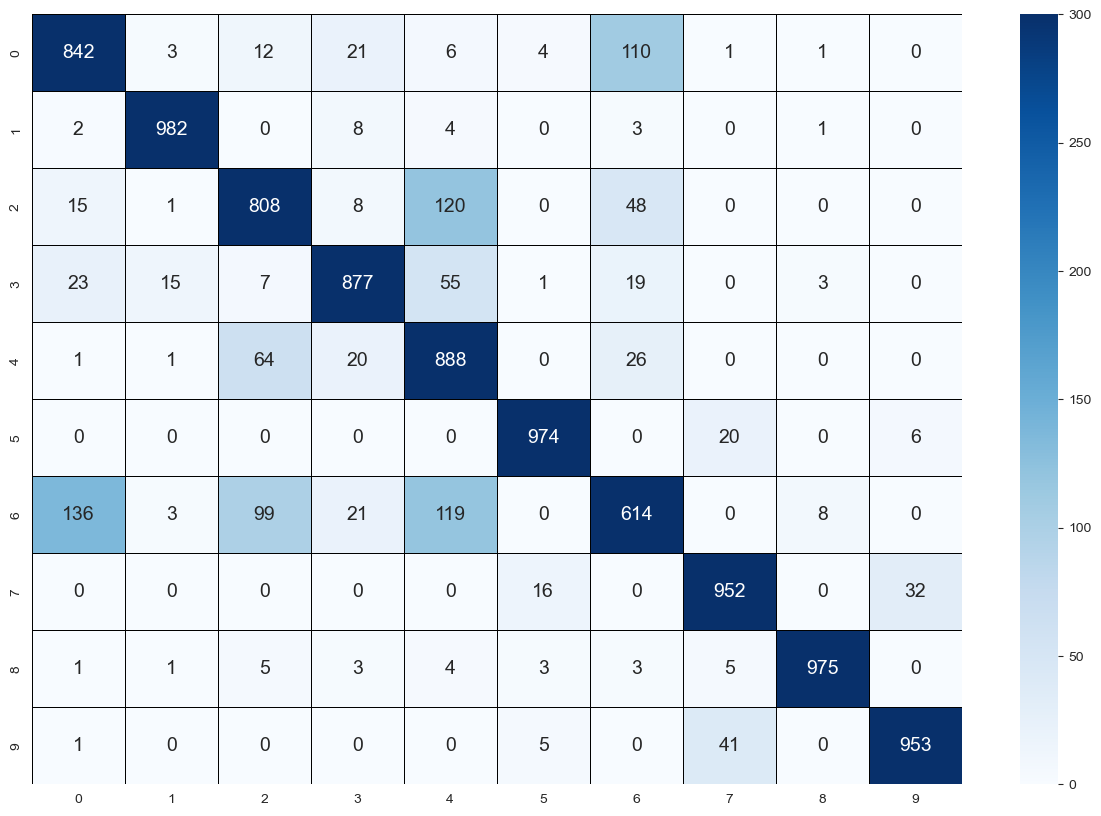

In [206]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)
plt.show()

# Modelling-3

In [70]:
from tensorflow.keras.layers import BatchNormalization

In [71]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(28, 28, 1),
        padding="same",
    )
)
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])



In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

In [162]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
1688/1688 [==============================] - 96s 55ms/step - loss: 0.6269 - accuracy: 0.7846 - val_loss: 56.8523 - val_accuracy: 0.1000
Epoch 2/50
1688/1688 [==============================] - 91s 54ms/step - loss: 0.4093 - accuracy: 0.8597 - val_loss: 66.9611 - val_accuracy: 0.1000
Epoch 3/50
1688/1688 [==============================] - 91s 54ms/step - loss: 0.3687 - accuracy: 0.8753 - val_loss: 51.3974 - val_accuracy: 0.1000
Epoch 4/50
1688/1688 [==============================] - 94s 56ms/step - loss: 0.3688 - accuracy: 0.8758 - val_loss: 15.3969 - val_accuracy: 0.1138
Epoch 5/50
1688/1688 [==============================] - 89s 53ms/step - loss: 0.3377 - accuracy: 0.8859 - val_loss: 8.0982 - val_accuracy: 0.1983
Epoch 6/50
1688/1688 [==============================] - 87s 51ms/step - loss: 0.3242 - accuracy: 0.8894 - val_loss: 16.9759 - val_accuracy: 0.1113
Epoch 7/50
1688/1688 [==============================] - 87s 52ms/step - loss: 0.3121 - accuracy: 0.8954 - val_loss: 1.3

In [163]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
6,0.312,0.895,1.348,0.560
7,0.303,0.898,5.723,0.201
8,0.301,0.899,12.566,0.208
9,0.287,0.904,16.816,0.106
10,0.280,0.906,54.864,0.100


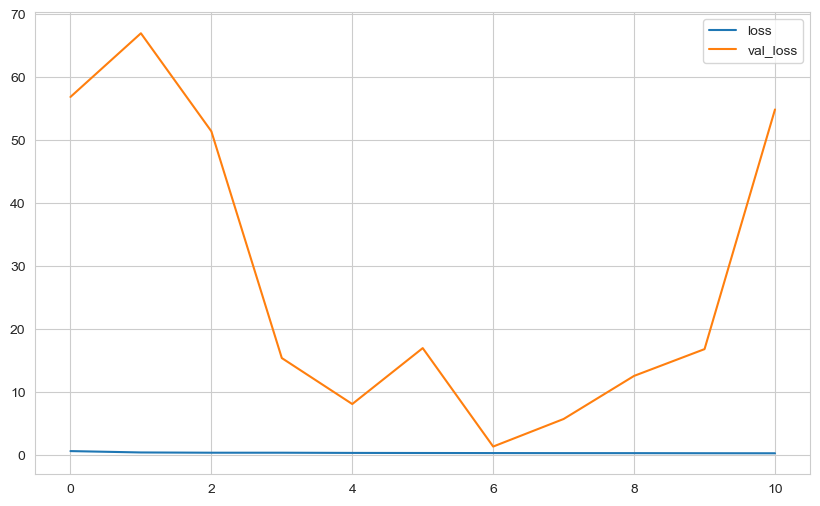

In [164]:
summary[["loss", "val_loss"]].plot()
plt.show()

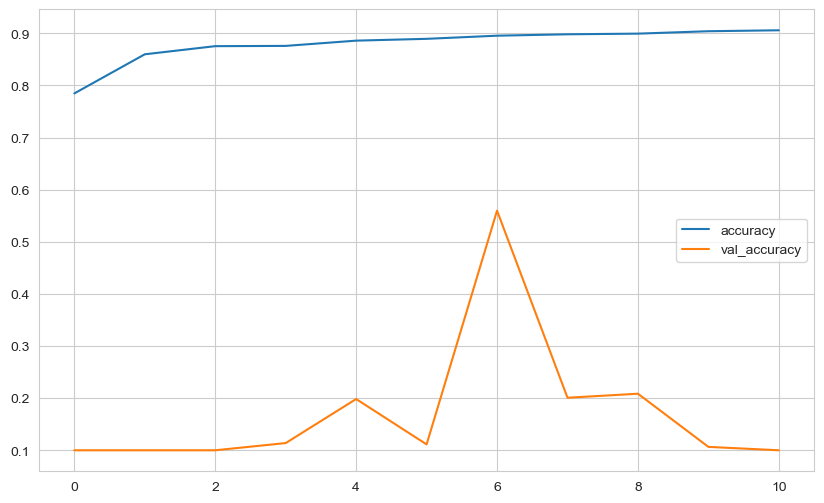

In [165]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [166]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.3479 - accuracy: 0.5597


[1.3479124307632446, 0.5597000122070312]

In [167]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.3479124307632446
Test accuracy: 0.5597000122070312


In [168]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [169]:
y_pred = np.argmax(pred_prob, axis=1)

In [170]:
y_pred

array([6, 2, 1, ..., 6, 1, 6], dtype=int64)

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.35      0.50      1000
           1       1.00      0.93      0.96      1000
           2       0.96      0.33      0.49      1000
           3       0.97      0.51      0.67      1000
           4       0.85      0.35      0.49      1000
           5       0.83      0.87      0.85      1000
           6       0.19      0.97      0.32      1000
           7       0.98      0.20      0.33      1000
           8       1.00      0.72      0.84      1000
           9       0.99      0.37      0.54      1000

    accuracy                           0.56     10000
   macro avg       0.87      0.56      0.60     10000
weighted avg       0.87      0.56      0.60     10000



<Axes: >

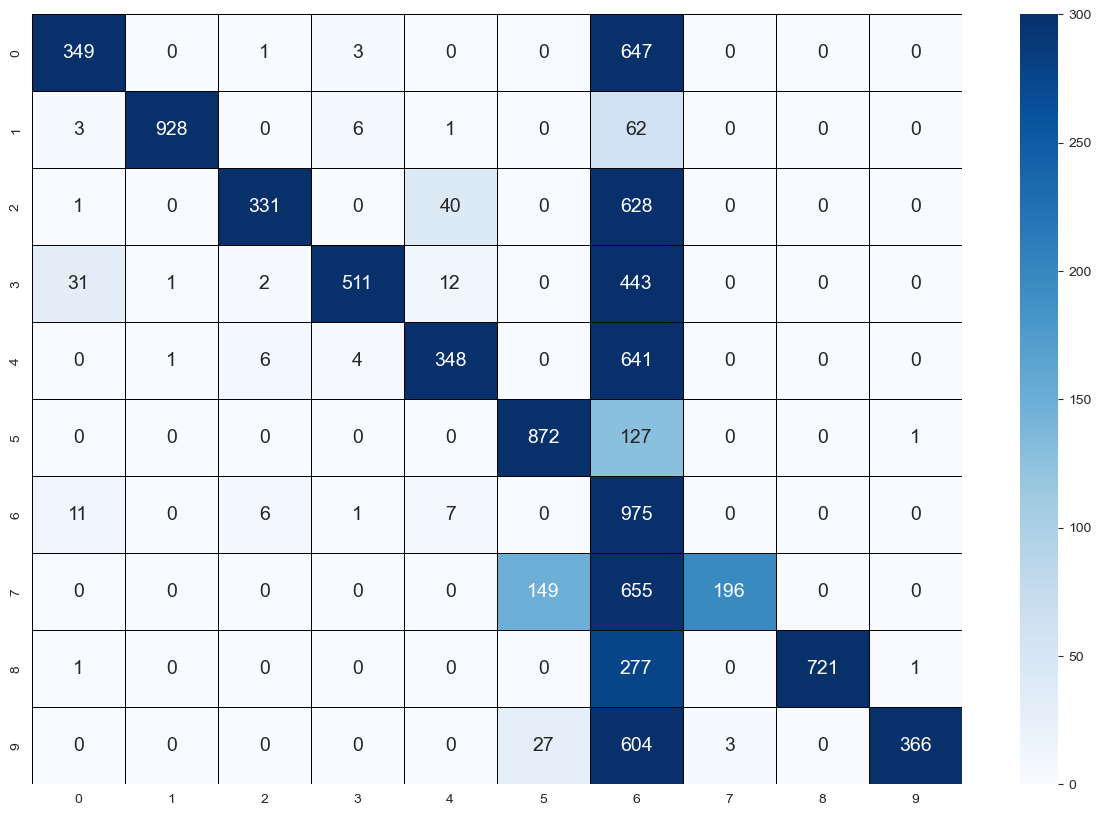

In [172]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)

## Final Model

In [79]:
model = Sequential()

model.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(28, 28, 1),
        padding="same",
    )
)
model.add(Conv2D(filters=56, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=112, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 56)        14168     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 56)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 56)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 112)       56560     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 112)        0         
 2D)                                                  

In [81]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True
)

In [82]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
1688/1688 [==============================] - 54s 31ms/step - loss: 0.4532 - accuracy: 0.8345 - val_loss: 0.3263 - val_accuracy: 0.8777
Epoch 2/50
1688/1688 [==============================] - 53s 31ms/step - loss: 0.3006 - accuracy: 0.8924 - val_loss: 0.3297 - val_accuracy: 0.8779
Epoch 3/50
1688/1688 [==============================] - 57s 34ms/step - loss: 0.2693 - accuracy: 0.9024 - val_loss: 0.2783 - val_accuracy: 0.8941
Epoch 4/50
1688/1688 [==============================] - 55s 33ms/step - loss: 0.2595 - accuracy: 0.9091 - val_loss: 0.3612 - val_accuracy: 0.9082
Epoch 5/50
1688/1688 [==============================] - 59s 35ms/step - loss: 0.2560 - accuracy: 0.9096 - val_loss: 0.2621 - val_accuracy: 0.9087
Epoch 6/50
1688/1688 [==============================] - 55s 33ms/step - loss: 0.2536 - accuracy: 0.9113 - val_loss: 0.2927 - val_accuracy: 0.9009
Epoch 7/50
1688/1688 [==============================] - 55s 33ms/step - loss: 0.2526 - accuracy: 0.9121 - val_loss: 0.2633 -

In [83]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.453,0.835,0.326,0.878
1,0.301,0.892,0.330,0.878
2,0.269,0.902,0.278,0.894
3,0.260,0.909,0.361,0.908
4,0.256,0.910,0.262,0.909
5,0.254,0.911,0.293,0.901
6,0.253,0.912,0.263,0.909
7,0.253,0.912,0.266,0.914
8,0.258,0.911,0.257,0.910
9,0.255,0.910,0.251,0.915


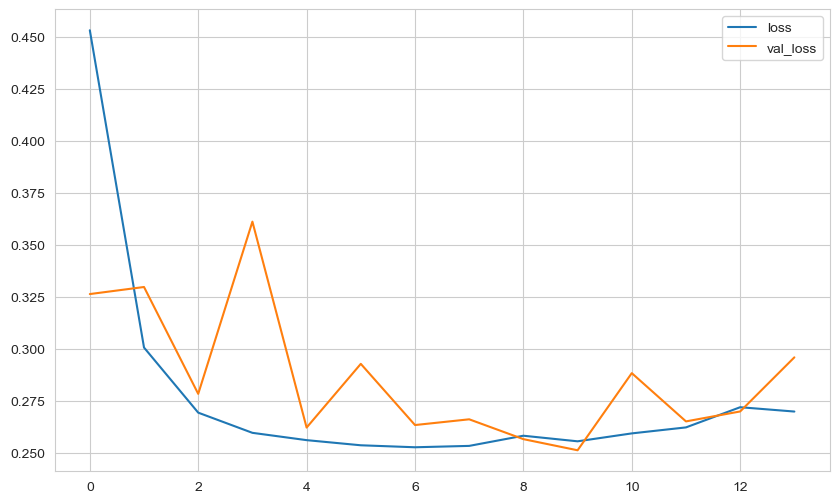

In [84]:
summary[["loss", "val_loss"]].plot()
plt.show()

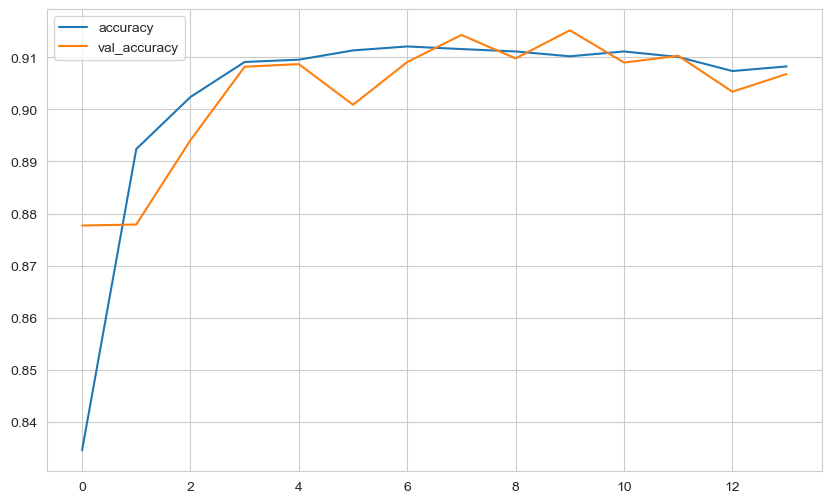

In [85]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [86]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2512 - accuracy: 0.9152


[0.25115644931793213, 0.9151999950408936]

In [87]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25115644931793213
Test accuracy: 0.9151999950408936


In [88]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [89]:
y_pred = np.argmax(pred_prob, axis=1)

In [90]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [92]:
from sklearn.metrics import confusion_matrix

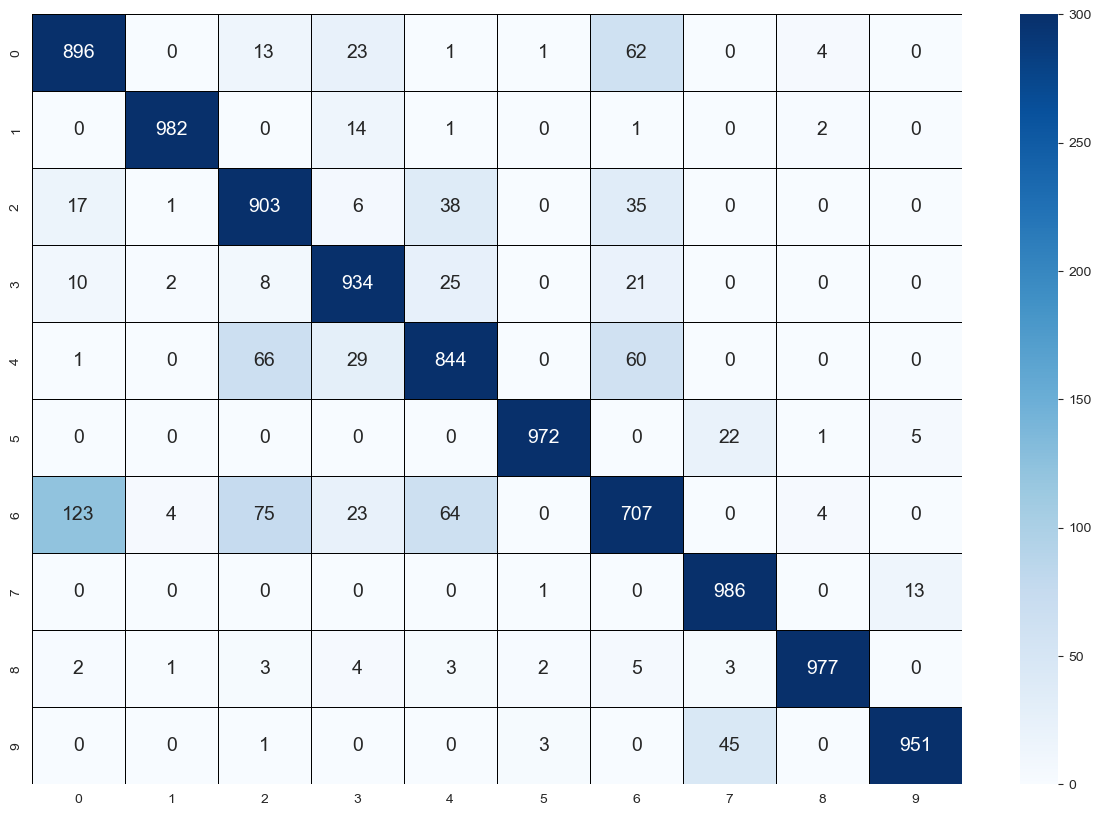

In [93]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)
plt.show()

## Prediction

In [94]:
my_image = X_test[44]

In [95]:
my_image.shape

(28, 28, 1)

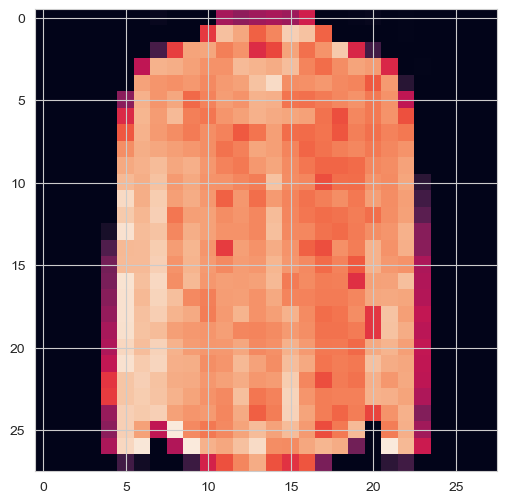

In [96]:
plt.imshow(my_image)
plt.show()

In [99]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 23ms/step


In [100]:
image_prediction

array([[9.3264267e-04, 3.6132230e-06, 5.5468469e-03, 5.9347373e-04,
        2.0881382e-01, 9.3940098e-06, 7.8408235e-01, 4.8956890e-06,
        1.0107533e-05, 2.7935419e-06]], dtype=float32)

In [101]:
np.argmax(image_prediction, axis=1)

array([6], dtype=int64)

In [102]:
result = np.argmax(image_prediction, axis=1)

In [103]:
result

array([6], dtype=int64)

In [104]:
classes[int(result)]

'Shirt'

In [105]:
model.save("cnn_2cpdcpd.h5")

# Load the Saved Model and Get Predictions

In [106]:
model = tf.keras.models.load_model("cnn_2cpdcpd.h5")

In [107]:
X_test[15].shape

(28, 28, 1)

In [108]:
np.expand_dims(X_test[15], axis=0).shape

(1, 28, 28, 1)

In [109]:
pred = model.predict(np.expand_dims(X_test[15], axis=0))

1/1 [==============================] - 0s 76ms/step


In [110]:
np.argmax(pred)

1

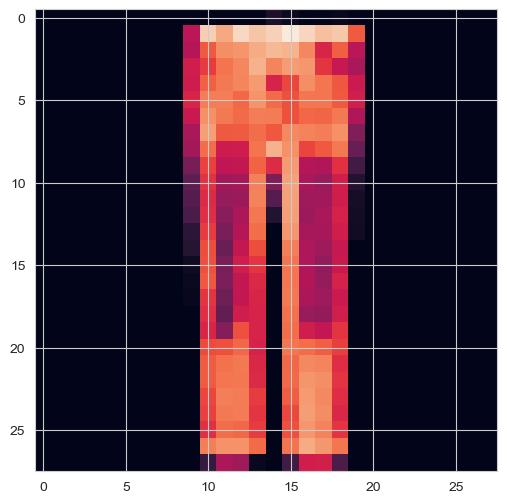

In [111]:
plt.imshow(X_test[15])
plt.show()

In [112]:
classes[8]

'Bag'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___